<a href="https://colab.research.google.com/github/Razanhus/Razan-mini-projects/blob/main/Embedding_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: Downloading and Using AraVec
    
### Step 1: Install the Required Packages

In this step, you will install all the necessary Python libraries required to use AraVec.

**Task:** Write the necessary code to install the following libraries:

- `gensim`: A popular library for word embeddings.
- `numpy`: For numerical operations.
- `tqdm`: For progress bars. (optional)
    

In [3]:
!pip install gensim nltk

In [2]:
import numpy as np
import nltk
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Step 2: Download AraVec Pre-trained Model

AraVec is an open-source Arabic word embedding model that comes pre-trained on various Arabic corpora. You will need to download the pre-trained model.

**Task:** Download the AraVec pre-trained model from the [official repository](https://github.com/bakrianoo/aravec).
    

In [1]:
#downloading pretrained model
!wget https://www.dropbox.com/s/ce9phmmawoe1ure/Twt-CBOW.zip
!wget https://www.dropbox.com/s/26mfjdspmz22dqp/Twt-SG.zip

!unzip Twt-CBOW.zip
!unzipTwt-SG.zip


--2024-09-09 08:35:49--  https://www.dropbox.com/s/ce9phmmawoe1ure/Twt-CBOW.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ywlqq631gpw75ta5x32d6/Twt-CBOW.zip?rlkey=cxzrg8siz5y4418op30q02465 [following]
--2024-09-09 08:35:50--  https://www.dropbox.com/scl/fi/ywlqq631gpw75ta5x32d6/Twt-CBOW.zip?rlkey=cxzrg8siz5y4418op30q02465
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb817cb7bbd4e5f2c3dc67f890f.dl.dropboxusercontent.com/cd/0/inline/CaMBKZRCoyZx8EIj2OvozD8lHW3Xnx-qZyIRTy7DJ_27kHm_bW4VEsEERryfvCfVTALAP2WxDRCR8ypFh1XuLHP4ND0TOXvSyJ_tEqzBfrLb03xlE7OivDVae_dh3vO4n8c/file# [following]
--2024-09-09 08:35:51--  https://ucb817cb7bbd4e5f2c3dc67f890f.dl.dropboxusercontent.com/cd/0/inline/CaMBKZRCoyZx8EIj2Ovo

### Step 3: Load the AraVec Model

Once the model is downloaded, you need to load it into your Python environment using `gensim`.

**Task:** Write the code to load the AraVec model.
    

In [11]:
from gensim.models import KeyedVectors
model = KeyedVectors.load('/content/Twt-CBOW')

### Step 4: Use AraVec to Find Similar Words

Now that the model is loaded, you can use it to find similar words. This is useful in natural language processing tasks like finding synonyms or analyzing word relationships.

**Task:** Write the code to find the top 5 words similar to a given Arabic word, such as "ملك" (king).
    

In [12]:
similar_words = model.wv.most_similar('ملك', topn=5)
print(similar_words)

[('لملك', 0.5928696990013123), ('بملك', 0.5477061867713928), ('ياملك', 0.4843748211860657), ('وملك', 0.4725903272628784), ('ملكه', 0.44895926117897034)]


In [13]:
similarity = model.wv.similarity('سلطان', 'ملك')
print(f"Similarity between 'سلطان' and 'ملك': {similarity}")

Similarity between 'سلطان' and 'ملك': 0.2724877893924713


### Step 5: Visualize Word Embeddings

You can use libraries like `matplotlib` or `seaborn` to visualize word embeddings in a 2D space. This gives you an intuitive understanding of how words are related to one another.

**Task:** Write the code to visualize the word embeddings of a list of Arabic words using a dimensionality reduction technique like PCA or t-SNE.
    

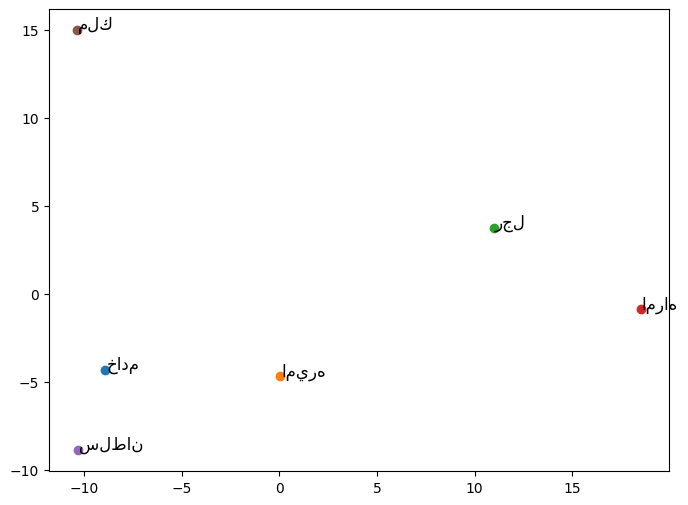

In [15]:
# Select a subset of words
words = ['خادم', 'اميره', 'رجل', 'امراه', 'سلطان', 'ملك']

# Get the vectors for the selected words
word_vectors = [model.wv[word] for word in words]

# Reduce the dimensionality to 2D using PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Plot the words in 2D space
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.text(word_vectors_2d[i, 0] + 0.05, word_vectors_2d[i, 1] + 0.05, word, fontsize=12)
plt.show()

### Step 6: Fine-tune AraVec with an Arabic Dataset

In this step, you'll fine-tune the AraVec model on a new Arabic dataset. This will help the model adapt to domain-specific or updated language usage.

**Task:**
- Find a relevant Arabic dataset (for example, from resources like [Kaggle](https://www.kaggle.com/) or [Hugging Face Datasets](https://huggingface.co/datasets).
- Preprocess the dataset (tokenization, removing unwanted characters, etc.).
- Fine-tune the AraVec model using `gensim`.
    

#### Preprocessing the Dataset

You will need to preprocess the dataset by tokenizing and cleaning the text.

In [18]:
import re
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd

nltk.download('punkt')

def preprocess_text(text):

    text = re.sub(r'[^ا-ي\s]', '', text)

    return word_tokenize(text)


df = pd.DataFrame({'text_column': ['السلام عليكم ورحمة الله وبركاته', 'عمري 24 سنه في عام 2024.']})

df['tokenized'] = df['text_column'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Fine-tuning AraVec

Once the dataset is preprocessed, you'll proceed to fine-tune the AraVec model using the processed text.

In [20]:

sentences = df['tokenized'].tolist()


model = KeyedVectors.load('/content/Twt-CBOW')


model.build_vocab(sentences, update=True)
model.train(sentences, total_examples=model.corpus_count, epochs=5)


model.save("fine_tuned_aravec.model")